In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hamming_distance_distribution import hamming_distance
from annealing import adjacency_from_couplings
from graph import is_connected

In [2]:
def annealing_by_connection(blocksize, fname):

    # read data from file
    data = np.load(fname, allow_pickle=True).item()

    N_blocks = int(data['size']/blocksize)
    N_correct_connected     = np.zeros(N_blocks)
    N_correct_unconnected   = np.zeros(N_blocks)
    N_connected             = np.zeros(N_blocks)
    N_unconnected           = np.zeros(N_blocks)

    for j in range(N_blocks):

        for i in range(blocksize):
            # get annealing results
            J_n         = data["J_n"][j*blocksize + i]
            alpha       = data["alpha"][j*blocksize + i]
            gs_array1   = data["gs_array"][j*blocksize + i]
      
            # classify annealing result
            d_Hamming = hamming_distance(alpha, gs_array1)
            connected = is_connected(adjacency_from_couplings(J_n))

            if connected:
                N_connected[j] += 1
                if d_Hamming==0:
                    N_correct_connected[j] += 1

            if not connected:
                N_unconnected[j] += 1
                if d_Hamming==0:
                    N_correct_unconnected[j] += 1

    return N_correct_connected, N_correct_unconnected, N_connected, N_unconnected


In [3]:
# ---------- Parameters for reading data file -------------
paths = ["./annealing_data/", "./exhaustive_search_data/"]
path = paths[1]

N = 5               # number of users
M = 4               # length of id-sequence for every user
K = 100              # number of antennas
xi = 0              # std of thermal noise

thres_min = 0.0
thres_max = 0.4
thres_step = 0.01

blocksize = 100       # resolution of y axis (equal to N_repeat from other program)

In [4]:
# ---------- Program ----------
thres_min = float(thres_min)
thres_max = float(thres_max)

N_neglection_thres = int((thres_max-thres_min)/thres_step)+1
data = np.load(path + f"neglection_thres_{thres_min}_N_5_M_4_K_100_xi_0.npy", allow_pickle=True).item()

N_blocks = int(data["size"]/blocksize)
print(f"file includes {data['size']} runs which get split into {N_blocks} blocks of size {blocksize}.")
N_stat = N_blocks

N_correct_connected     = np.zeros(shape=(N_neglection_thres, N_stat))
N_correct_unconnected   = np.zeros(shape=(N_neglection_thres, N_stat))
N_connected             = np.zeros(shape=(N_neglection_thres, N_stat))
N_unconnected           = np.zeros(shape=(N_neglection_thres, N_stat))

neglection_thres = np.zeros(N_neglection_thres)

for i in range(N_neglection_thres):
    neglection_thres[i] = thres_min + i*thres_step
    neglection_thres[i] = np.round(neglection_thres[i], 6)

    fname = path + f"neglection_thres_{neglection_thres[i]}_N_{N}_M_{M}_K_{K}_xi_{xi}.npy"
    print(f"{i}: {fname}")
    result = annealing_by_connection(blocksize, fname)

    N_correct_connected[i]      = result[0]
    N_correct_unconnected[i]    = result[1]
    N_connected[i]              = result[2]
    N_unconnected[i]            = result[3]


file includes 20000 runs which get split into 200 blocks of size 100.
0: ./exhaustive_search_data/neglection_thres_0.0_N_5_M_4_K_100_xi_0.npy
1: ./exhaustive_search_data/neglection_thres_0.01_N_5_M_4_K_100_xi_0.npy
2: ./exhaustive_search_data/neglection_thres_0.02_N_5_M_4_K_100_xi_0.npy
3: ./exhaustive_search_data/neglection_thres_0.03_N_5_M_4_K_100_xi_0.npy
4: ./exhaustive_search_data/neglection_thres_0.04_N_5_M_4_K_100_xi_0.npy
5: ./exhaustive_search_data/neglection_thres_0.05_N_5_M_4_K_100_xi_0.npy
6: ./exhaustive_search_data/neglection_thres_0.06_N_5_M_4_K_100_xi_0.npy
7: ./exhaustive_search_data/neglection_thres_0.07_N_5_M_4_K_100_xi_0.npy
8: ./exhaustive_search_data/neglection_thres_0.08_N_5_M_4_K_100_xi_0.npy
9: ./exhaustive_search_data/neglection_thres_0.09_N_5_M_4_K_100_xi_0.npy
10: ./exhaustive_search_data/neglection_thres_0.1_N_5_M_4_K_100_xi_0.npy
11: ./exhaustive_search_data/neglection_thres_0.11_N_5_M_4_K_100_xi_0.npy
12: ./exhaustive_search_data/neglection_thres_0.12_N_5

In [5]:
# ratios
if len(np.where(N_connected==0)[0])>0:
    print(f"Division by zero: N_connected   = 0 at {np.where(N_connected==0)}")
if len(np.where(N_unconnected==0)[0])>0:
    print(f"Division by zero: N_unconnected = 0 at {np.where(N_unconnected==0)}")

r_correct_connected     = N_correct_connected   /   N_connected
r_correct_unconnected   = N_correct_unconnected /   N_unconnected

Division by zero: N_connected   = 0 at (array([21, 22, 23, ..., 40, 40, 40]), array([ 89, 113,  29, ..., 197, 198, 199]))
Division by zero: N_unconnected = 0 at (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1

/tmp/ipykernel_2967/3773222365.py:7: RuntimeWarning: invalid value encountered in divide
  r_correct_connected     = N_correct_connected   /   N_connected
/tmp/ipykernel_2967/3773222365.py:8: RuntimeWarning: invalid value encountered in divide
  r_correct_unconnected   = N_correct_unconnected /   N_unconnected


In [6]:
# statistics
r_correct_connected_mean    = np.mean(r_correct_connected, axis=1)
dr_correct_connected        = np.std(r_correct_connected, axis=1)
dr_mean_correct_connected   = dr_correct_connected / np.sqrt(N_stat)

r_correct_unconnected_mean  = np.mean(r_correct_unconnected, axis=1)
dr_correct_unconnected      = np.std(r_correct_unconnected, axis=1)
dr_mean_correct_unconnected = dr_correct_unconnected / np.sqrt(N_stat)

total number of runs per neglection threshold: 100
obtained ratios:
correct connected: 
[0.9911     0.99104613 0.98910626 0.98950692 0.98874607 0.98578034
 0.98372861 0.97988915 0.97768802 0.97336461 0.97004867 0.9614416
 0.95509771 0.94712809 0.93027155 0.92606634 0.91177254 0.89955614
 0.89112336 0.84956964 0.83379427        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan] +- [0.00067376 0.00061502 0.00081301 0.00076495 0.00076006 0.0008713
 0.00095728 0.00106147 0.00129146 0.00145333 0.00159312 0.00184808
 0.00244024 0.00272605 0.00339312 0.0036865  0.00447775 0.0059631
 0.00602102 0.00760646 0.00880264        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan       

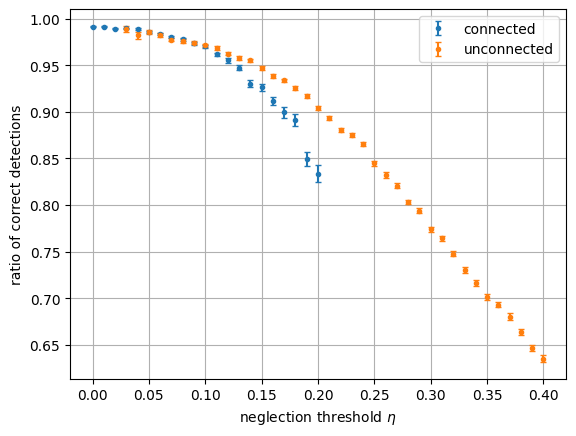

In [7]:
# Results

print(f"total number of runs per neglection threshold: {blocksize}")
print("obtained ratios:")
print(f"correct connected: \n{r_correct_connected_mean} +- {dr_mean_correct_connected}, \nunconnected: \n{r_correct_unconnected_mean} +- {dr_correct_unconnected}")

# Plotting
plt.errorbar(x=neglection_thres, y=r_correct_connected_mean, yerr=dr_mean_correct_connected, label="connected", capsize=2, ls="none", marker=".")
plt.errorbar(x=neglection_thres, y=r_correct_unconnected_mean, yerr=dr_mean_correct_unconnected, label="unconnected", capsize=2, ls="none", marker=".")
plt.xlabel(r"neglection threshold $\eta$")
plt.ylabel("ratio of correct detections")
plt.legend()
plt.grid()
plt.show()

correct connected: UER = 1 - r


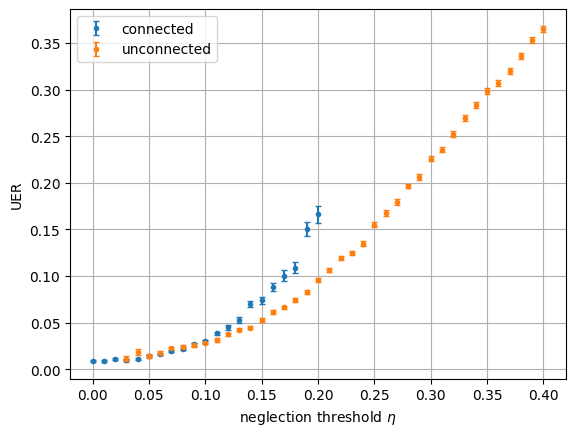

In [9]:
# use the same data but show it in a different fashion: The user error rate
print(f"UER = 1 - r")
# Plotting
plt.errorbar(x=neglection_thres, y=1-r_correct_connected_mean, yerr=dr_mean_correct_connected, label="connected", capsize=2, ls="none", marker=".")
plt.errorbar(x=neglection_thres, y=1-r_correct_unconnected_mean, yerr=dr_mean_correct_unconnected, label="unconnected", capsize=2, ls="none", marker=".")
plt.xlabel(r"neglection threshold $\eta$")
plt.ylabel("UER")
plt.legend()
plt.grid()
plt.show()